In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### Load and view data

In [2]:
data = pd.read_csv('europe.csv')
data.head()

,Country,Area,GDP,Inflation,Life.expect,Military,Pop.growth,Unemployment
0,Austria,83871,41600,3.5,79.91,0.80,0.03,4.2
1,Belgium,30528,37800,3.5,79.65,1.30,0.06,7.2
2,Bulgaria,110879,13800,4.2,73.84,2.60,-0.80,9.6
3,Croatia,56594,18000,2.3,75.99,2.39,-0.09,17.7
4,Czech Republic,78867,27100,1.9,77.38,1.15,-0.13,8.5


### Boxplot of numerical data

In [3]:
X = data.drop(columns='Country')

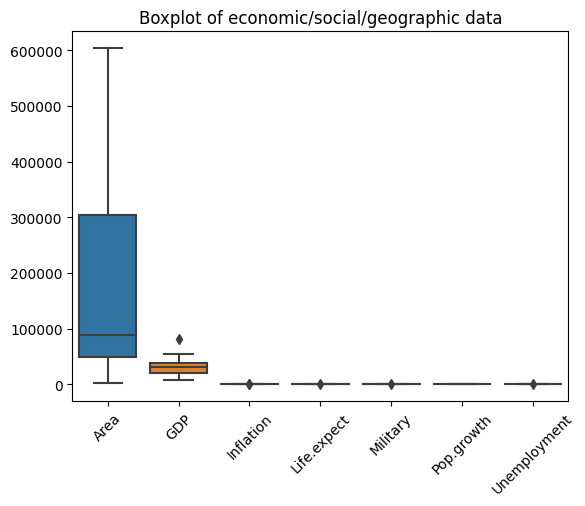

In [4]:
sns.boxplot(data=X)
plt.xticks(rotation=45)
plt.title('Boxplot of economic/social/geographic data')
plt.show()

=> becomes evident that data should be normalized

### Normalize data

In [5]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X)

StandardScaler()

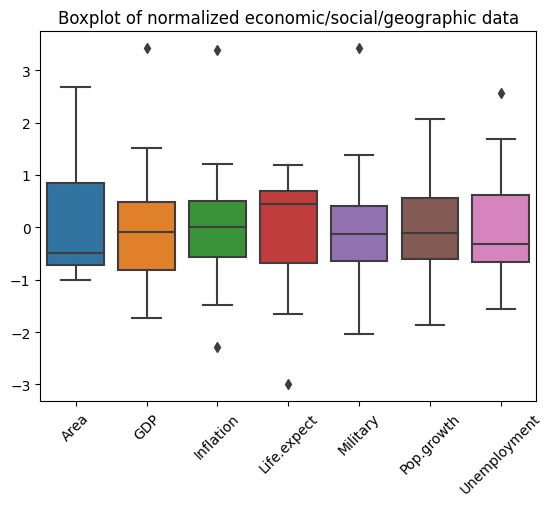

In [6]:
X_norm = sc.transform(X)

sns.boxplot(data=X_norm)
plt.xticks(rotation=45)
plt.title('Boxplot of normalized economic/social/geographic data')
plt.xticks(range(len(X.columns)), X.columns)
plt.show()

### Perform PCA

In [7]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_norm)

PCA()

In [8]:
def plot_spectre_variance_expl(valprop):
    tot = sum(np.abs(valprop))
    var_exp = [(i / tot) for i in sorted(np.abs(valprop), reverse=True)]
    cum_var_exp = np.cumsum(var_exp)
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.bar(range(1, valprop.size + 1), np.abs(valprop), alpha=0.5, align="center", label="Individual")
    plt.title("Correlation matrix Eigenvalues")
    plt.ylabel("Explained variance")
    plt.xlabel("Principal components")
    plt.subplot(1, 2, 2)
    markerline, stemlines, baseline = plt.stem(range(1, valprop.size + 1), cum_var_exp, "-r", label="Individual")
    plt.setp(stemlines, "color", "r", "linewidth", 2)
    plt.plot(range(1, valprop.size + 1), cum_var_exp, "b-.",label="Cumulative")
    plt.title("Cumulated explained variance (in %)")
    plt.ylabel("Explained variance")
    plt.xlabel("Principal components")
    plt.tight_layout()

Plot eigen-spectrum (explained variance of each projection axis)

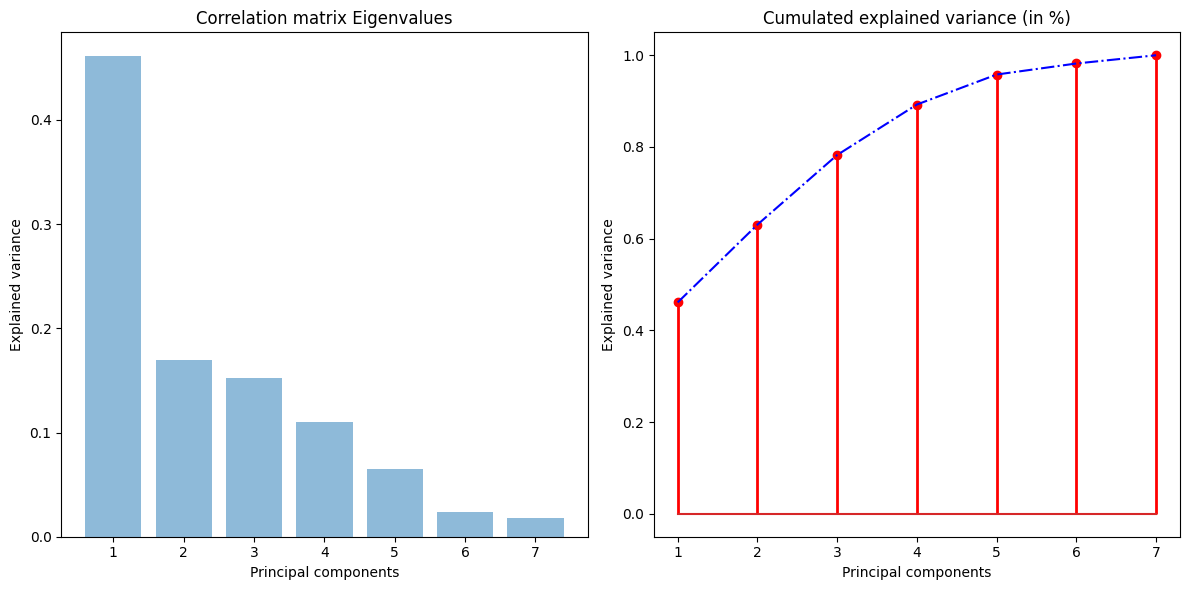

In [9]:
plot_spectre_variance_expl(pca.explained_variance_ratio_)

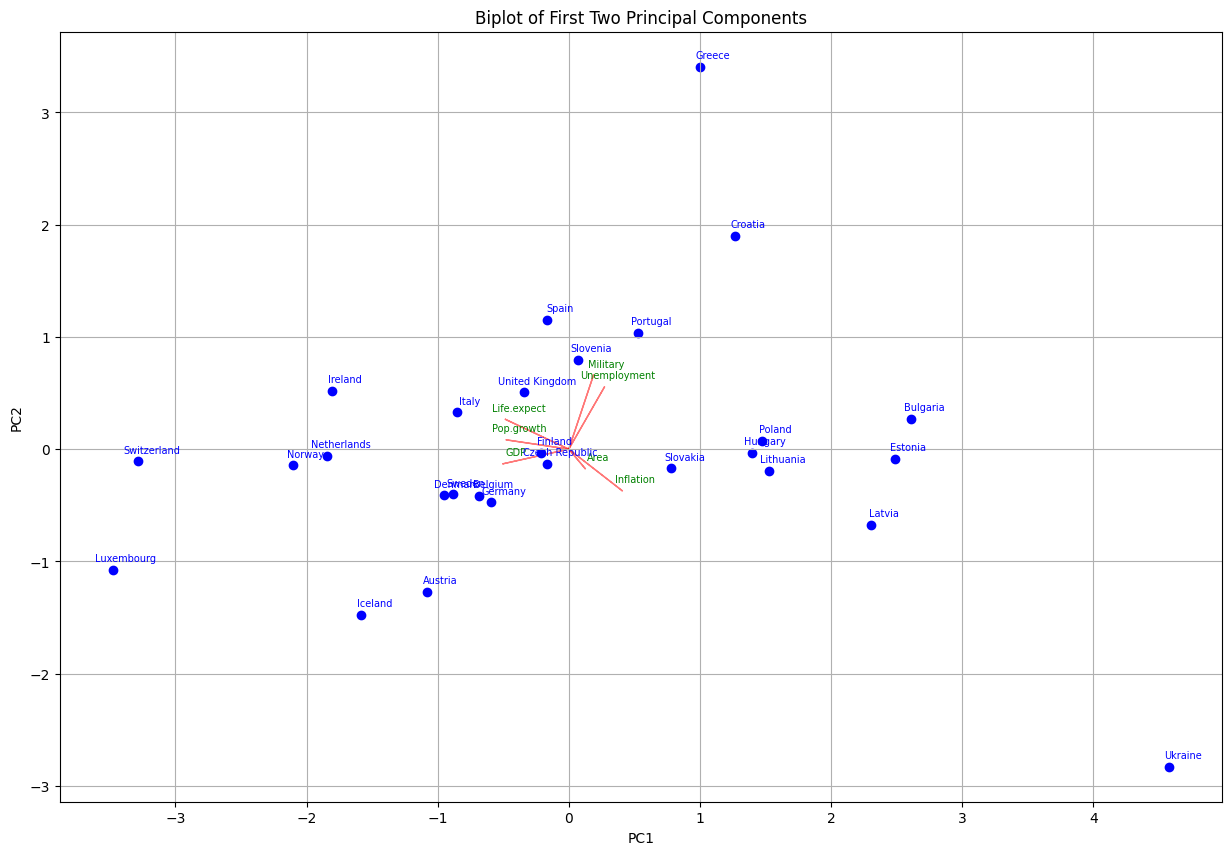

In [11]:
components = pca.components_

def biplot(score, coeff, labels=None):
    plt.figure(figsize=(15, 10))
    plt.grid()
    plt.xlabel('PC1')
    plt.ylabel('PC2')

    for i in range(len(coeff)):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i, 0]+0.1, coeff[i, 1]+0.1, features.columns[i], color='g', ha='center', va='center', fontsize=7)
        else:
            plt.text(coeff[i, 0]+0.1, coeff[i, 1]+0.1, labels[i], color='g', ha='center', va='center', fontsize=7)
    
    for j in range(score.shape[0]):
        plt.scatter(score[j, 0], score[j, 1], color='b')
        plt.text(score[j, 0]+0.1, score[j, 1]+0.1, data['Country'][j], color='b', ha='center', va='center', fontsize=7)

# Plot biplot
biplot(pca.transform(X_norm)[:, :2], pca.components_.T[:, :2], labels=X.columns)
plt.title('Biplot of First Two Principal Components')
plt.show()